step: 0   loss 79458.7051338
step: 1   loss 44264.2534063
step: 2   loss 34182.4135287
step: 3   loss 29507.2217239
step: 4   loss 26872.3956674
step: 5   loss 25217.3597208
step: 6   loss 24100.2045796
step: 7   loss 23306.0290438
step: 8   loss 22718.9959824
step: 9   loss 22271.70139
step: 10   loss 21922.5125493
step: 11   loss 21644.4587454
step: 12   loss 21419.3753357
step: 13   loss 21234.6274251
step: 14   loss 21081.1838145
step: 15   loss 20952.4368029
step: 16   loss 20843.4531376
step: 17   loss 20750.4840127
step: 18   loss 20670.6359632
step: 19   loss 20601.64462
step: 20   loss 20541.7159217
step: 21   loss 20489.4125814
step: 22   loss 20443.5715426
step: 23   loss 20403.2430523
step: 24   loss 20367.6450691
step: 25   loss 20336.128718
step: 26   loss 20308.1518156
step: 27   loss 20283.258367
step: 28   loss 20261.062532
step: 29   loss 20241.2359762
step: 30   loss 20223.4978069
step: 31   loss 20207.6065054
step: 32   loss 20193.3534113
step: 33   loss 20180.55742

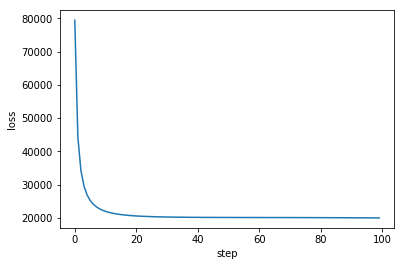

In [13]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.loadtxt('u1.base')
X_test = np.loadtxt('u1.test')
X_train = X_train[:,0:3]
X_test = X_test[:,0:3]
num_user = 943
num_item = 1682

#Populate the original scoring matrix
rating_train = np.zeros((num_user,num_item))
for i in range(80000):
    user_id = int(X_train[i,0])
    item_id = int(X_train[i,1])
    rating = X_train[i,2]
    rating_train[user_id-1,item_id-1] = rating    
rating_test = np.zeros((num_user,num_item))
for i in range(20000):
    user_id = int(X_test[i,0])
    item_id = int(X_test[i,1])
    rating = X_test[i,2]
    rating_test[user_id-1,item_id-1] = rating

def matrix_factorization(R_train, R_valid, P, Q, K, iterations, learning_rate,lamda):
    R = R_train
    loss = []
    epoch_set=[]
    e_pre = 100000
    for epoch in range(iterations):
        for i in range(num_user):
            for j in range(num_item):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + learning_rate * (2 * eij * Q[k][j] - lamda * P[i][k])
                        Q[k][j] = Q[k][j] + learning_rate * (2 * eij * P[i][k] - lamda * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(num_user):
            for j in range(num_item):
                if R_valid[i][j] > 0:
                    e = e + pow(R_valid[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (lamda/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < e_pre:
            e_pre = e
        #若loss增加过大，缩小学习率
        elif e - e_pre > 0.01:
            learning_rate *= 0.9
        loss.append(e)
        print("step:",epoch,"  loss", e)
        if e < 0.001:
            break
    return P, Q, loss


K=3
iterations = 100
learning_rate = 0.001
lamda = 0.02
P = np.random.rand(num_user,K)
Q = np.random.rand(K,num_item)

nP,nQ,n_loss = matrix_factorization(rating_train,rating_test,P,Q,K,iterations,learning_rate,lamda)
R_pre = np.dot(nP,nQ)
print(R_pre)
#paint
plt.xlabel('step')
plt.ylabel('loss')
plt.plot(n_loss)
plt.show()
